
# <span style="color:red"> Numerical Simulation Laboratory (NSL) </span>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

<h1><font color='ForestGreen'>ESERCITAZIONE 5: METROPOLIS E CAMPIONAMENTO FUNZIONE D'ONDA  </font> </h1>

<h3><font color = 'LightGreen'>Intro:</font></h3>

All'interno del contesto della meccanica quantistica, un sistema è descritto da un generico ket. Sviluppato su una appropriata base dello spazio considerato, questo viene espresso come sovrapposizione di diversi autostati, ciascuno dei quali viene moltiplicato per un opportuno coefficiente complesso. Il significato di per se' e' abbastanza semplice: individua la probabilità, da un punto di vista quantistico e non meramente classico, che il sistema si possa trovare in uno di questi determinati stati di base.
Tali basi, in generale, possono essere raccolte in due categorie: continue da un lato, discrete dall'altro.
Per quanto concerne osservabili il cui spettro di autovalori e' continuo, come la posizione o l'impulso, lo sviluppo dell'autofunzione del sistema invero e' piu' propriamente definibile come una funzione d'onda il cui modulo quadro da' la probabilita' di trovarci nel particolare autostato dell'osservabile osservati rispetto le cui autofunzioni si e' sviluppato il ket di partenza. Per essere precisi, questi autoket associati ad allo spettro
continuo di una osservabile non sono propriamente funzioni dello spazio di hilbert, bensi' elementi di uno spazio di distribuzione che include lo spazio
di hilbert stesso. Per fare degli esempi, se si considera l'operatore posizione questo ha spettro continui e suoi autovettori non sono nient'altro che delta di dirac; similmente, per quanto rigurada l'operatore momento, gli autostati invece non sono nient'altro che onde piane una volta espressi in
rappresentazione spaziale(naturalmente espressi nello spazio degli impulsi son anch'essi delle delte di dirac).
Queste quantita' e' chiaro che non appartengono allo spazio $L^2$ delle funzioni $L$-integrabili, il quale spazio e' il solo e' unico ad avere strettamente un significato fisico ed ha soddisfare la conserazione della energia, sibbene sono distribuzioni il cui senso fisico e' rappresentare situazioni limiti di fondamentale importanza concettuale ed applicativa.

<h3><font color = 'LightGreen'>Esercitazione:</font></h3>



Il problema fondamentale della meccanica quantistica e' risolvere los spettro dell'energia, cioe' determinare la soluzione della equazione agli autovalori meglio noto-se espressa in rappresentazione cartesiana- equazione di Schodinger.Ad essere onesti, poco problemi sono risolti in maniera esatta e per quanto importanti concettualmente rappresentano spesso situazioni limite abbastanza indealizzate. Uno dei risultati analitici piu' importanti e caratterizzate da una soluzione esatta è quello dell'atomo di idrogeno, il quale funge non solo da paradigma concettuale per tutta la fisica atomica definendo pure il linguaggio ma altresi' rappresenta il tassello base da cui partire per lo studio di tutte gli atomi multielettronici piu' complessi. La sua semplicità deriva dall'assenza dell'interazione tra gli elettroni la quale semplifica notevolmente il problema. Per atomi a più elettroni, possono essere utilizzati metodi come Hartree-Fock o la teoria DFT. La soluzione analitica dell'atomo di idrogeno è
<p style = "text-align:center">
$\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)$
</p>
dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$, $L_{n-l-1}^{2l+1}$ rappresentano i polinomi di Laguerre opportunamente parametrizzati e di grado $n-l-1$
e $Y_l^m(\theta,\phi)$ indicano invece le armoniche sferiche.
<br>
In particolare, il ground state(1s) e il primo eccitato(2p) di una particella in 3-D senza spin, non relativisitca
<p style = "text-align:center">
$\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}$
</p>
<p style = "text-align:center">
$\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)$
</p>
Un ulteriore obiettivo, inoltre, tramite data blocking e' poi ricavare il raggio medio dell'atomo di idrogeno nel caso in cui il sistema si trovi negli autostati di cui sopra:
<p style = "text-align:center">
$\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$
</p>

Sarebbe curioso poter capire come si distribuiscono le particelle nello spazio secondo tali ; tale obbiettivo può essere raggiunto trovando l'inversa della cumulativa ma non è questo il caso.

Un metodo alternativo per il campionamento è quello proposto da Metropolis. L'algoritmo costruisce un random walk per l'osservabile che si vuole campionare, accettando o rigettando una nuova posizione proposta. Uno dei peggiori difetti è legato alla convergenza: l'algoritmo inizia a campionare nel modo corretto solo asintoticamente.
Bisogna prestare particolare attenzione anche alla correlazione delle misure. Se si costruisse un random walk con un passo troppo piccolo, si rischierebbe di ottenere misure estremamente correlate; se fosse troppo grande, molte misure potrebbero essere rigettate. Per tali motivi bisogna scegliere un passo che permetta di ottenere un'accettenza del 50%.

<span style="color:blue">In sintesi, il campionameto delle due distribuzioni, nonche' la determinazione dei rispetti raggi orbitali, viene compiuto
due volte: il primo caso considerando come probabilita' tentativo una densita' di proabilita' gaussiana centrata nel passo precedente; nel secondo caso, vicecersa, considerando il caso di transizione uniforme. Il passo delta nei due casi sara' differenti. Importante, sebbene non vincolante, e' una giudiziosa scelta del punto di partenza in modo tale che la simulazione risulti essere piu' efficente. Conviene partire da punti ad alta densita' in modo tale da favorire l'accettazione</span>

<h2><font color = 'LimeGreen'>ESERCIZIO 5.1: Campionamento Funzione d'Onda Metropolis:</font></h2>

<h3><font color = 'LightGreen'>Gauss</font></h3>

In questo primo riquadro viene raffigurato il campionamento della distribuzione dell'orbitale 1s assumento come probabilita'
di transizione tentativo un andamento di tipo gaussiano:

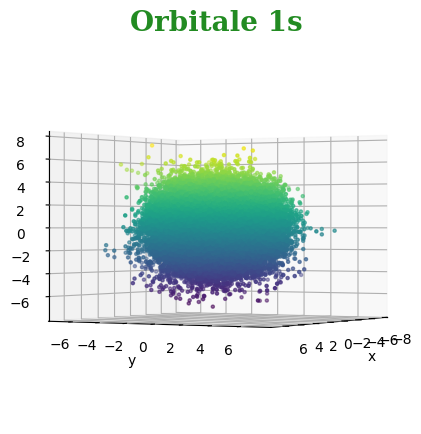

In [3]:
X, Y, Z= np.loadtxt("EX_5.1_A/orbitale1s.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title ("Orbitale 1s", fontsize = 20, fontweight = "bold", color = "ForestGreen", family = "Serif")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 30)
plt.show()

Similmente, qui si e' ripetuto il campionamento merce' Metropolis andando pero' a rappresentare la funzione d'onda 2p

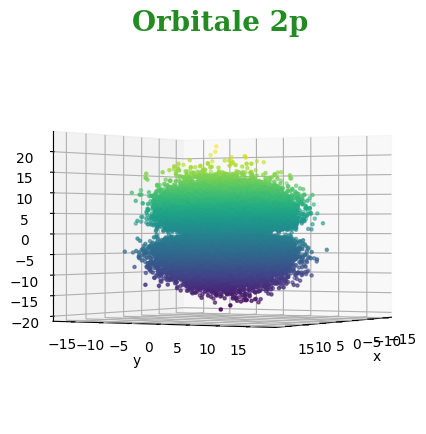

In [4]:
X, Y, Z= np.loadtxt("EX_5.1_A/orbitale2p.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title ("Orbitale 2p", fontsize = 20, fontweight = "bold", color = "ForestGreen", family = "Serif")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 30)
plt.show()

Raffigure le configurazioni spaziali del processo stocastico, si vuole utilizzare il corretto campionamento di siffatte due distribuzioniù
per determinare il raggio medio dell'atomo di idrogeno. Per l'orbitale 1s si ottiene:

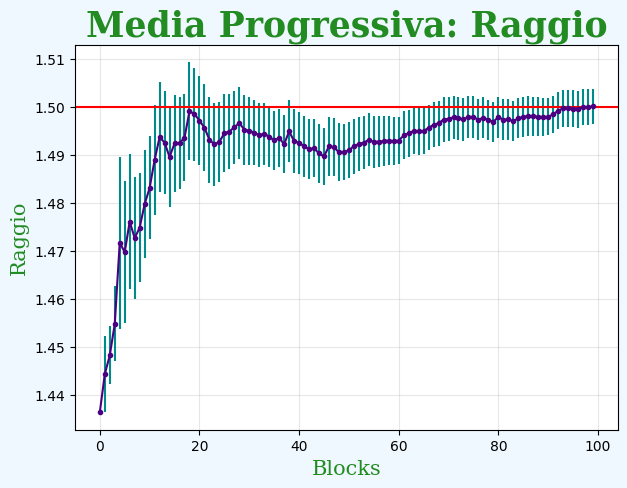

In [8]:
plt.figure(figsize=(7,5), facecolor = "AliceBlue")

x,ave, err = np.loadtxt("EX_5.1_A/mt1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, color = "Indigo", ecolor = "DarkCyan", marker = ".")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.xlabel('Blocks', fontdict = font)
plt.ylabel('Raggio' , fontdict = font)
plt.title("Media Progressiva: Raggio", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")
plt.grid(True, alpha = 0.3)
plt.axhline(y=1.5, c = "r")


plt.show()

In [9]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('STIMA RAGGIO:  ')
print(ave[-1])
print('\nINCERTEZZA : ')
print(err[-1])
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

STIMA RAGGIO:  
1.50013

INCERTEZZA : 
0.00371564

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



Per quanto inferisce invece l'orbitale 2p la simulazione sotto data blocking fornisce:

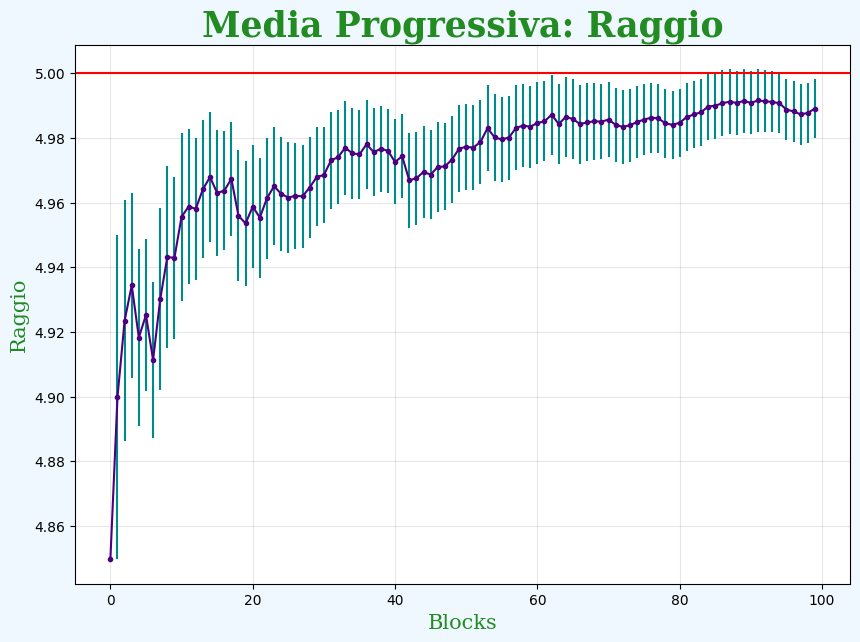

In [12]:
plt.figure(figsize=(10,7), facecolor = "AliceBlue")

x,ave, err = np.loadtxt("EX_5.1_A/mt2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, color = "Indigo", ecolor = "DarkCyan", marker = ".")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.xlabel('Blocks', fontdict = font)
plt.ylabel('Raggio' , fontdict = font)
plt.title("Media Progressiva: Raggio", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")

plt.grid(True, alpha = 0.3)
plt.axhline(y=5, c = "r")
plt.show()

In [8]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('STIMA RAGGIO:  ')
print(ave[-1])
print('\nINCERTEZZA : ')
print(err[-1])
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

STIMA RAGGIO:  
4.98909

INCERTEZZA : 
0.00925028

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



<h3><font color = 'LightGreen'>Uniforme</font></h3>

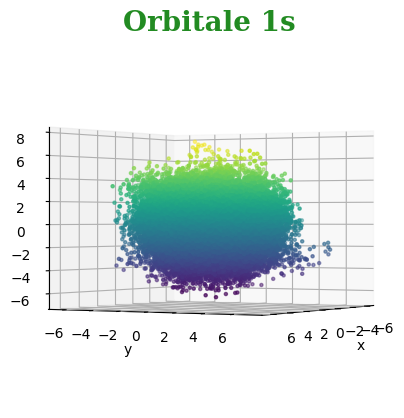

In [14]:
X, Y, Z= np.loadtxt("EX_5.1_B/orbitale1s.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title ("Orbitale 1s", fontsize = 20, fontweight = "bold", color = "ForestGreen", family = "Serif")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 30)
plt.show()

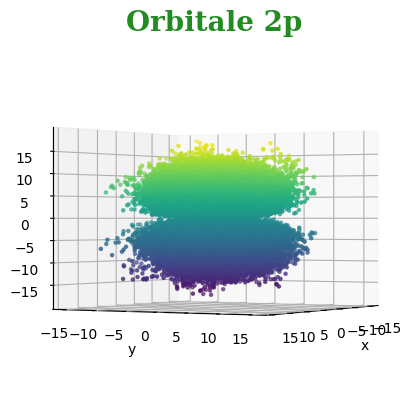

In [25]:
X, Y, Z= np.loadtxt("EX_5.1_B/orbitale2p.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title ("Orbitale 2p", fontsize = 20, fontweight = "bold", color = "ForestGreen", family = "Serif")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(0, 30)
plt.show()

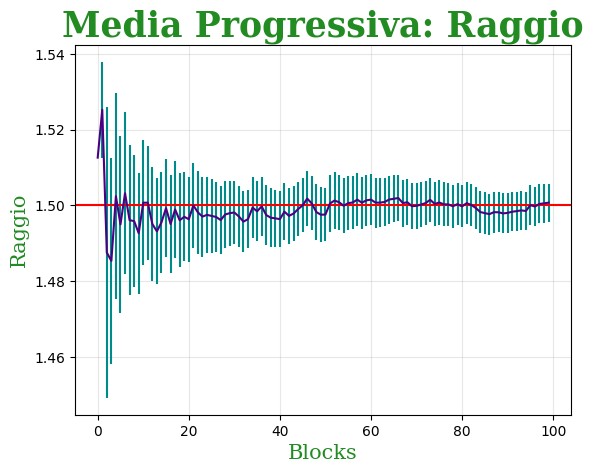

In [18]:

x,ave, err = np.loadtxt("EX_5.1_B/mt1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, color = "Indigo", ecolor = "DarkCyan")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.xlabel('Blocks', fontdict = font)
plt.ylabel('Raggio' , fontdict = font)
plt.title("Media Progressiva: Raggio", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")
plt.grid(True, alpha = 0.3)
plt.axhline(y=1.5, c = "r")

plt.show()

In [17]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('STIMA RAGGIO:  ')
print(ave[-1])
print('\nINCERTEZZA : ')
print(err[-1])
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

STIMA RAGGIO:  
1.50073

INCERTEZZA : 
0.00505

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



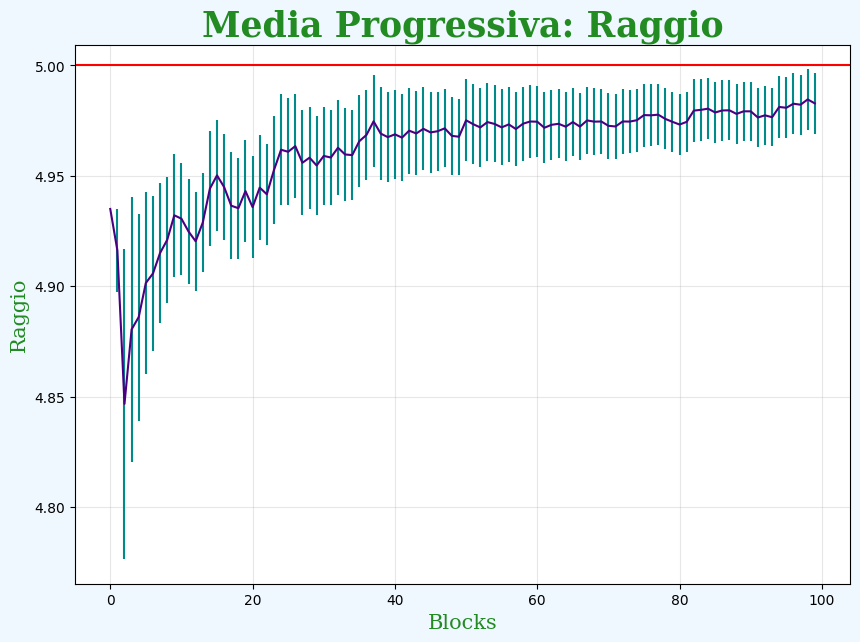

In [21]:
plt.figure(figsize=(10,7), facecolor = "AliceBlue")

x,ave, err = np.loadtxt("EX_5.1_B/mt2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, color = "Indigo", ecolor = "DarkCyan")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.xlabel('Blocks', fontdict = font)
plt.ylabel('Raggio' , fontdict = font)
plt.title("Media Progressiva: Raggio", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")

plt.grid(True, alpha = 0.3)
plt.axhline(y=5, c = "r")
plt.show()

In [14]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('STIMA RAGGIO:  ')
print(ave[-1])
print('\nINCERTEZZA : ')
print(err[-1])
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

STIMA RAGGIO:  
4.9828

INCERTEZZA : 
0.0136563

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

